In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [2]:
from sklearn.preprocessing import OneHotEncoder

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
from sklearn.metrics import accuracy_score

In [6]:
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.
C:\Users\jahna\anaconda3\envs\py36\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\jahna\anaconda3\envs\py36\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\jahna\anaconda3\envs\py36\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\jahna\anaconda3\envs\py36\lib\site-packag

In [7]:
data=pd.read_csv("C:/Users/jahna/Downloads/diabetes.csv")

In [8]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [9]:
x = data.iloc[:,:8].values
y = data.iloc[:,8:].values

In [11]:
len(x)

768

In [12]:
len(y)

768

In [18]:
sc = StandardScaler()
x = sc.fit_transform(x)

In [19]:
x

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [20]:
ohe = OneHotEncoder()
y = ohe.fit_transform(y).toarray()

In [21]:
y

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]])

In [22]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3)

In [23]:
model = Sequential()
model.add(Dense(16, input_dim=8, activation='relu'))
model.add(Dense(12, activation= 'relu'))
model.add(Dense(2, activation= 'softmax'))

In [24]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [25]:
history = model.fit(x_train, y_train, validation_data = (x_test,y_test), epochs=50, batch_size=32)


Train on 537 samples, validate on 231 samples
Epoch 1/50
537/537 [==============================] - 0s 223us/step - loss: 0.6447 - accuracy: 0.6946 - val_loss: 0.6281 - val_accuracy: 0.6623
Epoch 2/50
537/537 [==============================] - 0s 41us/step - loss: 0.6081 - accuracy: 0.7356 - val_loss: 0.6007 - val_accuracy: 0.6926
Epoch 3/50
537/537 [==============================] - 0s 45us/step - loss: 0.5776 - accuracy: 0.7337 - val_loss: 0.5736 - val_accuracy: 0.7229
Epoch 4/50
537/537 [==============================] - 0s 42us/step - loss: 0.5475 - accuracy: 0.7393 - val_loss: 0.5452 - val_accuracy: 0.7446
Epoch 5/50
537/537 [==============================] - 0s 42us/step - loss: 0.5201 - accuracy: 0.7449 - val_loss: 0.5252 - val_accuracy: 0.7576
Epoch 6/50
537/537 [==============================] - 0s 45us/step - loss: 0.5013 - accuracy: 0.7542 - val_loss: 0.5065 - val_accuracy: 0.7835
Epoch 7/50
537/537 [==============================] - 0s 42us/step - loss: 0.4894 - accuracy: 0

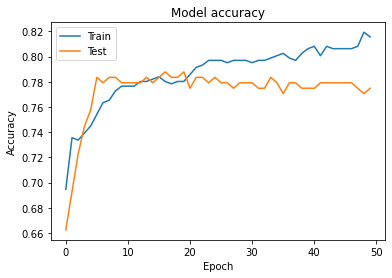

In [26]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

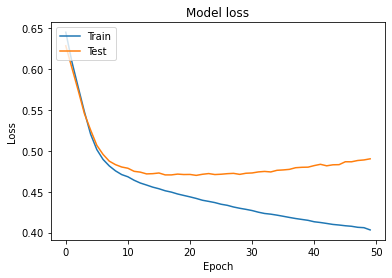

In [27]:
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

In [45]:
##KNN 

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [46]:
x_train, x_test, y_train, y_test = train_test_split(data.loc[:, data.columns != 'Outcome'], data['Outcome'], stratify=data['Outcome'], random_state=999)

In [47]:
training_accuracy = []
test_accuracy = []

In [48]:
neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(x_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(x_train, y_train))
    # record test set accuracy
    test_accuracy.append(knn.score(x_test, y_test))

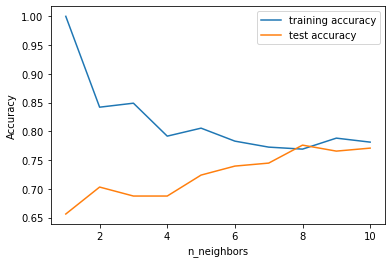

In [49]:
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.savefig('knn_compare_model')

In [50]:
print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(x_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn.score(x_test, y_test)))

Accuracy of K-NN classifier on training set: 0.78
Accuracy of K-NN classifier on test set: 0.77


In [51]:
##Logistic Regression

from sklearn.linear_model import LogisticRegression

In [55]:
x_train, x_test, y_train, y_test = train_test_split(data.loc[:, data.columns != 'Outcome'], data['Outcome'], stratify=data['Outcome'], random_state=66)

In [56]:
logreg = LogisticRegression().fit(x_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(x_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(x_test, y_test)))

Training set score: 0.781
Test set score: 0.766


C:\Users\jahna\anaconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [57]:
logreg001 = LogisticRegression(C=0.01).fit(x_train, y_train)
print("Training set accuracy: {:.3f}".format(logreg001.score(x_train, y_train)))
print("Test set accuracy: {:.3f}".format(logreg001.score(x_test, y_test)))

Training set accuracy: 0.762
Test set accuracy: 0.760


C:\Users\jahna\anaconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [59]:
logreg100 = LogisticRegression(C=100).fit(x_train, y_train)
print("Training set accuracy: {:.3f}".format(logreg100.score(x_train, y_train)))
print("Test set accuracy: {:.3f}".format(logreg100.score(x_test, y_test)))

Training set accuracy: 0.783
Test set accuracy: 0.781


C:\Users\jahna\anaconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [60]:
##Decision Trees

from sklearn.tree import DecisionTreeClassifier

In [61]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(x_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(x_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.714


In [62]:
##Gradient Boosting

from sklearn.ensemble import GradientBoostingClassifier

In [65]:
gb = GradientBoostingClassifier(random_state=0)
gb.fit(x_train, y_train)
print("Accuracy on training set: {:.3f}".format(gb.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gb.score(x_test, y_test)))

Accuracy on training set: 0.917
Accuracy on test set: 0.792


In [66]:
gb1 = GradientBoostingClassifier(random_state=0, max_depth=1)
gb1.fit(x_train, y_train)
print("Accuracy on training set: {:.3f}".format(gb1.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gb1.score(x_test, y_test)))

Accuracy on training set: 0.804
Accuracy on test set: 0.781
